In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
# библиотеки

In [2]:
# инициализиация

pmin, pmax, qmin, qmax = -2.5, 1.5, -2, 2
# пусть c = p + iq и p меняется в диапазоне от pmin до pmax,
# а q меняется в диапазоне от qmin до qmax

ppoints, qpoints = 200, 200
# число точек по горизонтали и вертикали

max_iterations = 300
# максимальное количество итераций

infinity_border = 10
# если ушли на это расстояние, считаем, что ушли на бесконечность

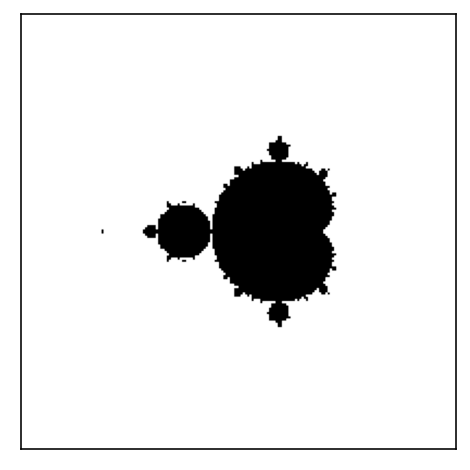

In [3]:
%%timeit

image = np.zeros((ppoints, qpoints))
# image — это двумерный массив, в котором будет записана наша картинка
# по умолчанию он заполнен нулями

for ip, p in enumerate(np.linspace(pmin, pmax, ppoints)):
    for iq, q in enumerate(np.linspace(qmin, qmax, qpoints)):
        c = p + 1j * q
        # буквой j обозначается мнимая единица: чтобы Python понимал, что речь
        # идёт о комплексном числе, а не о переменной j, мы пишем 1j
        
        z = 0
        for k in range(max_iterations):
            z = z**2 + c
            # Самая Главная Формула
            
            if abs(z) > infinity_border:
                # если z достаточно большое, считаем, что последовательость
                # ушла на бесконечность
                # или уйдёт
                # можно доказать, что infinity_border можно взять равным 4
                
                image[ip,iq] = 1
                # находимся вне M: отметить точку как белую
                break
plt.xticks([])
plt.yticks([])
# выключим метки на осях

plt.imshow(-image.T, cmap='Greys')
# транспонируем картинку, чтобы оси были направлены правильно
# перед image стоит знак минус, чтобы множество Мандельброта рисовалось
# чёрным цветом

1.52 s ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


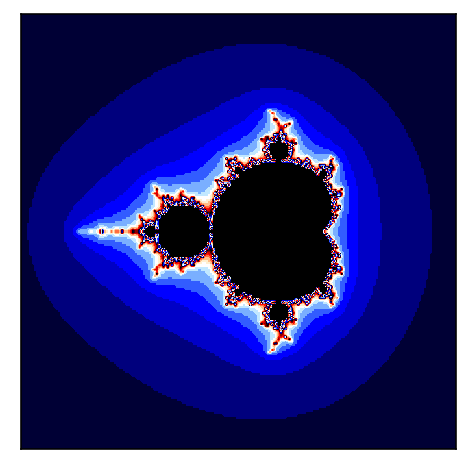

In [5]:
image = np.zeros((ppoints, qpoints))
# image — это двумерный массив, в котором будет записана наша картинка
# по умолчанию он заполнен нулями

for ip, p in enumerate(np.linspace(pmin, pmax, ppoints)):
    for iq, q in enumerate(np.linspace(qmin, qmax, qpoints)):
        c = p + 1j * q
        # буквой j обозначается мнимая единица: чтобы Python понимал, что речь
        # идёт о комплексном числе, а не о переменной j, мы пишем 1j
        
        z = 0
        for k in range(max_iterations):
            z = z**2 + c
            # Самая Главная Формула
            
            if abs(z) > infinity_border:
                image[ip,iq] = k
                break
plt.xticks([])
plt.yticks([])
# выключим метки на осях

plt.imshow(-image.T, cmap='flag')
# транспонируем картинку, чтобы оси были направлены правильно
# перед image стоит знак минус, чтобы множество Мандельброта рисовалось
# чёрным цветом
# параметр cmap задаёт палитру

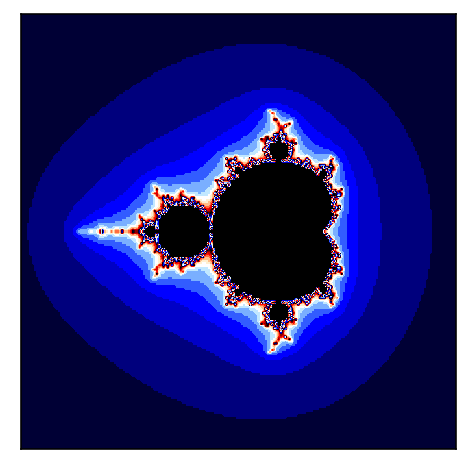

In [8]:
image = np.zeros((ppoints, qpoints))
# image — это двумерный массив, в котором будет записана наша картинка
# по умолчанию он заполнен нулями

p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
# np.mgrid создаёт сетку значений p и q, ppoints*1j здесь означает
# что мы хотим получить ppoints точек — это такая магия

c = p + 1j*q
z = np.zeros_like(c)
# теперь c и z — это двумерные матрицы

for k in range(max_iterations):
    z = z**2 + c
    # Самая Главная Формула осталась без изменений
    # но в данном случае операции производятся с матрицами
    # и действуют поэлементно
    
    mask = (np.abs(z) > infinity_border) & (image == 0)
    # это означает следующее: мы находим все ячейки в матрице z, 
    # у которых модуль очень большой, и одновременно в соответствующей
    # ячейке в матрице image находится ноль
    
    image[mask] = k
    # заносим все найденные ячейки в image значение k
    # это аналог оператора if из предыдущей версии кода
    
    z[mask] = np.nan
    # те ячейки, про которые мы уже понимаем, что там 
    # z «ушло на бесконечность», мы не будем дальше обрабатывать
    # для этого вносим в них специальное значение np.nan
    # это поможет нам избежать ошибок переполнения

plt.xticks([])
plt.yticks([])
plt.imshow(-image.T, cmap='flag')

In [4]:
def mandelbrot(pmin, pmax, ppoints, qmin, qmax, qpoints, 
               max_iterations=200, infinity_border=10):
    image = np.zeros((ppoints, qpoints))
    p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j*q
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z**2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T

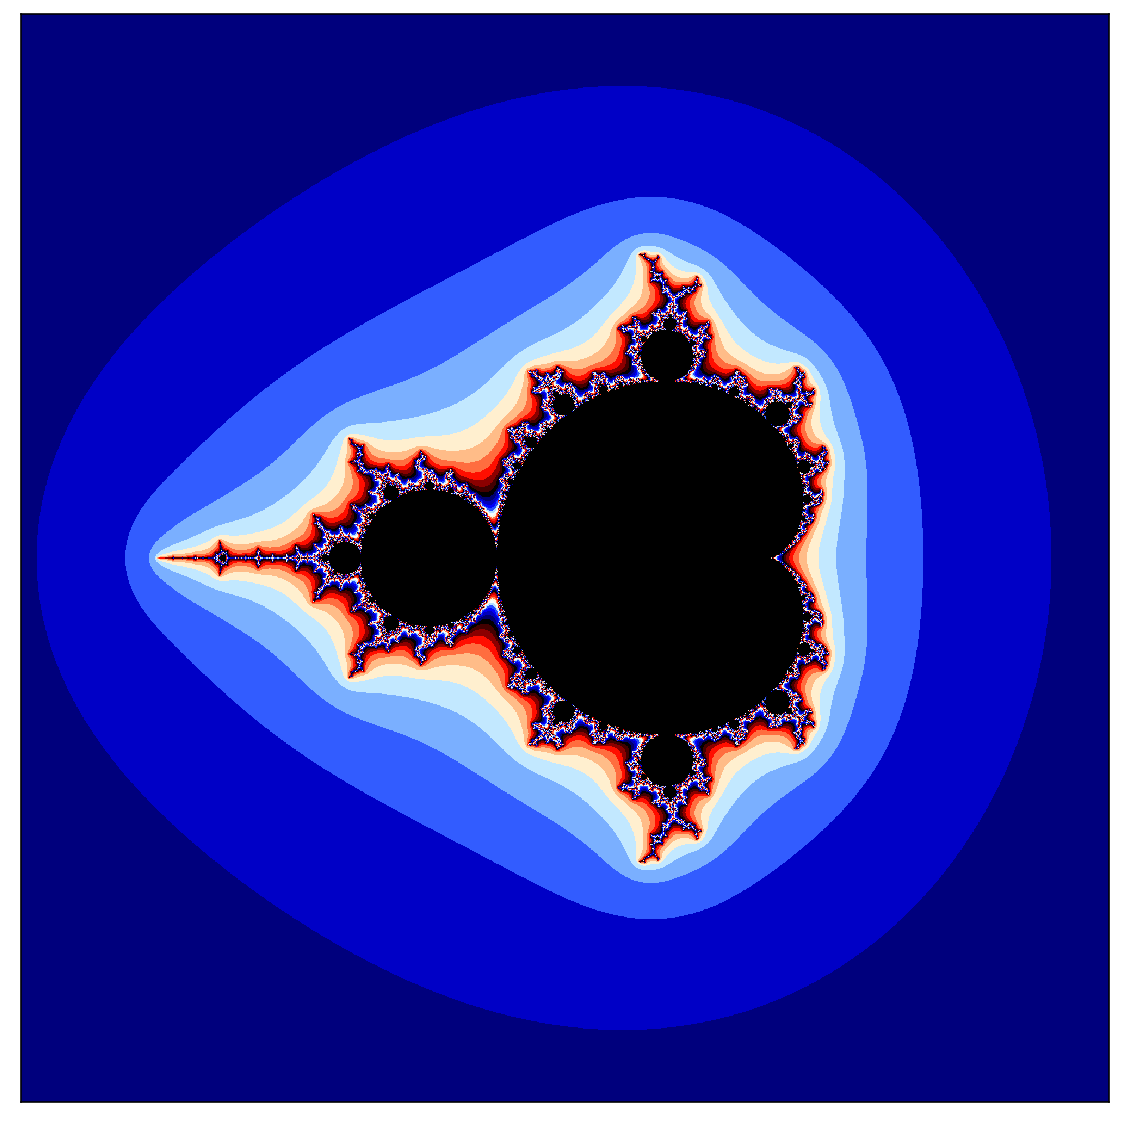

In [5]:
plt.figure(figsize=(10, 10))
image = mandelbrot(-2.5, 1.5, 2000, -2, 2, 2000)
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='flag', interpolation='none')

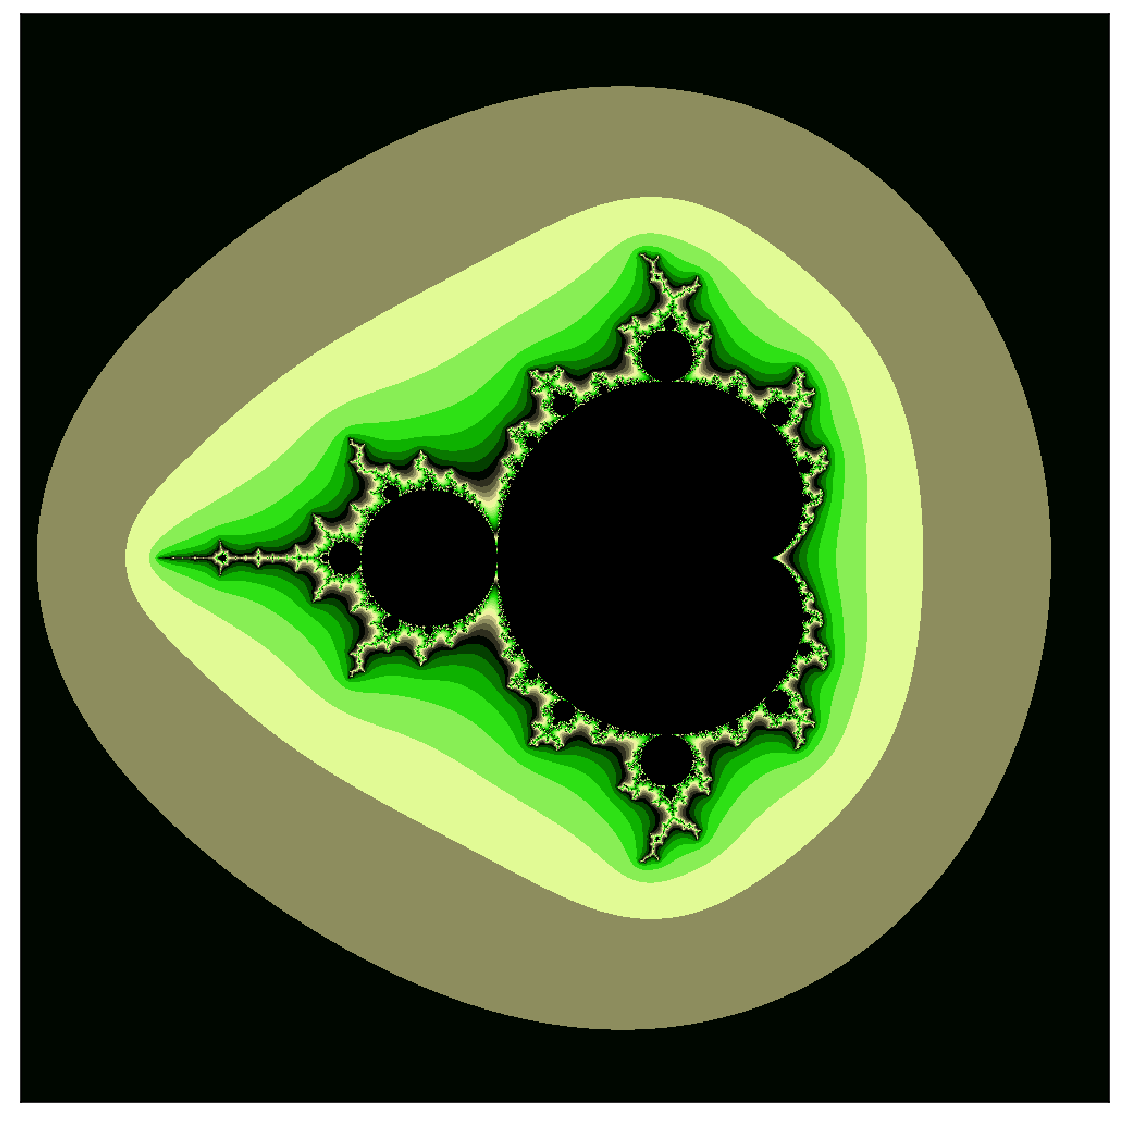

In [17]:
from itertools import cycle
import matplotlib.colors as clr
colorpoints = [(1-(1-q)**4, c) for q, c in zip(np.linspace(0, 1, 20), 
                                               cycle(['#ffffaa', '#000000', 
                                                      '#11dd00',]))]
cmap = clr.LinearSegmentedColormap.from_list('mycmap', 
                                             colorpoints, N=2048)

# LinearSegmentedColormap создаёт палитру по заданным точкам и заданным цветам
# можете попробовать выбрать другие цвета

plt.figure(figsize=(10, 10))
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap=cmap, interpolation='none')

<Figure size 720x720 with 0 Axes>

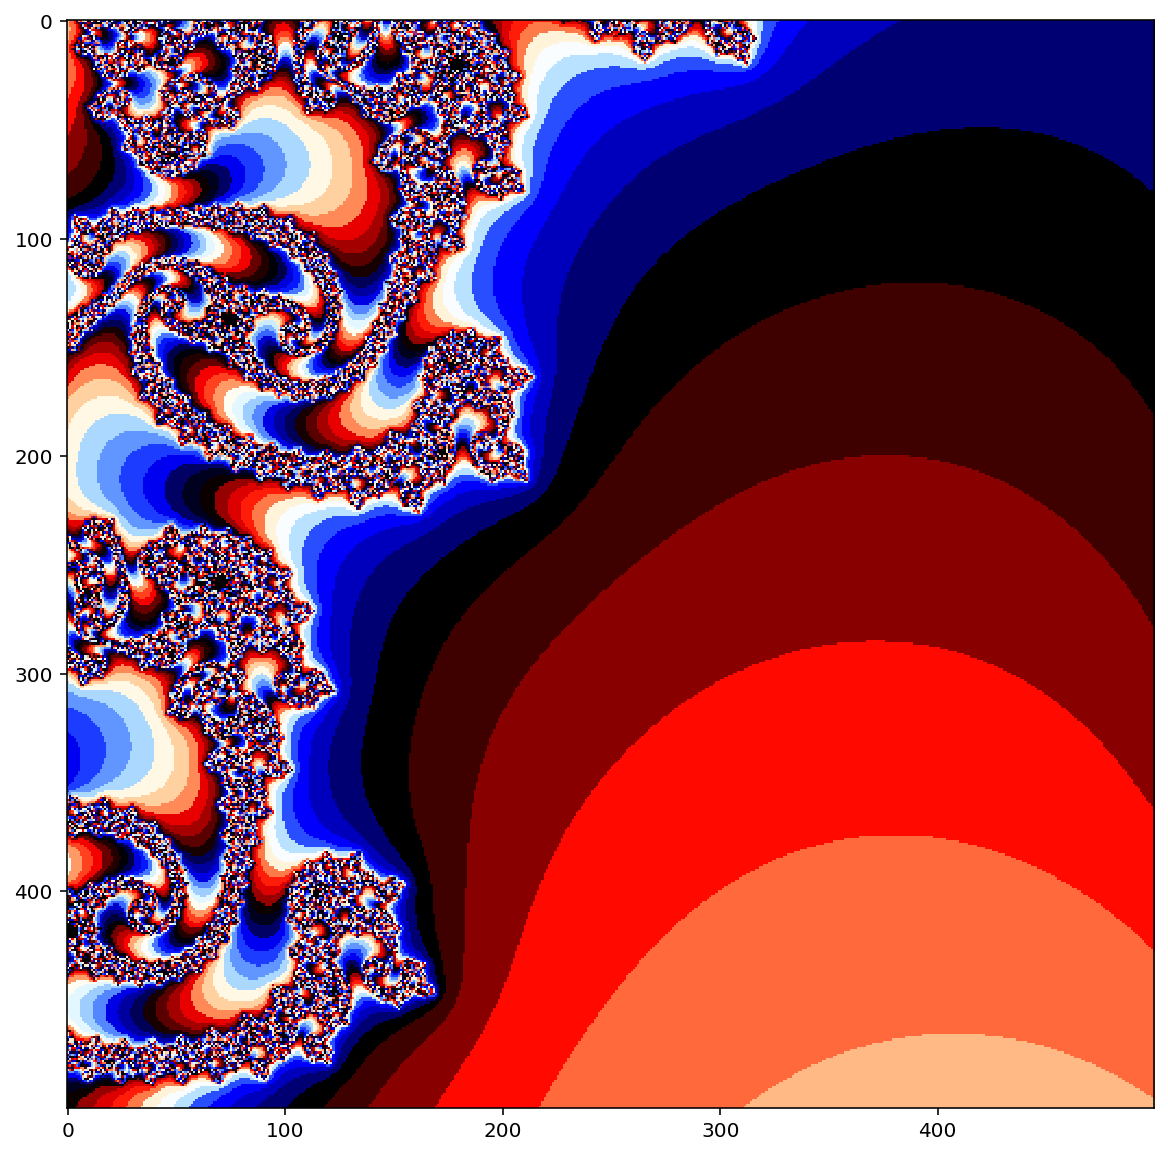

In [9]:
from matplotlib import animation, rc

rc('animation', html='html5')
# отображать анимацию в виде html5 video

fig = plt.figure(figsize=(10, 10))
max_frames = 200
max_zoom = 300
pmin, pmax, qmin, qmax = -2.5, 1.5, -2, 2

images = []
# кэш картинок

def init():
    return plt.gca()

def animate(i):
    if i > max_frames // 2:
        # фаза zoom out, можно достать картинку из кэша
        
        plt.imshow(images[max_frames//2-i], cmap=cmap)
        return
    
    p_center, q_center = -0.793191078177363, 0.16093721735804
    zoom = (i / max_frames * 2)**3 * max_zoom + 1
    scalefactor = 1 / zoom
    pmin_ = (pmin - p_center) * scalefactor + p_center
    qmin_ = (qmin - q_center) * scalefactor + q_center
    pmax_ = (pmax - p_center) * scalefactor + p_center
    qmax_ = (qmax - q_center) * scalefactor + q_center
    image = mandelbrot(pmin_, pmax_, 500, qmin_, qmax_, 500)
    plt.imshow(image, cmap=cmap)
    images.append(image)
    
    # добавить картинку в кэш
    return plt.gca()

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='flag', interpolation='none')